# Exploratory Spatial Data Analysis


## Imports

We also need esda and mapclassify for this notebook.

In [92]:
import pandas as pd
import geopandas as gpd
import libpysal.api as lp
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
import contextily as ctx
import shapely.geometry as geom
%matplotlib inline

In [93]:
df = gpd.read_file('data/neighborhoods.shp')
# was created in previous notebook with df.to_file('data/neighborhoods.shp')

In [94]:
df.head()

,neighbourh,neighbou_1,median_pri,geometry
0,Blankenfelde/Niederschönhausen,Pankow,37.5,"POLYGON ((1493006.880445722 6912074.798336806,..."
1,Helmholtzplatz,Pankow,58.0,"POLYGON ((1493245.549433984 6900059.695978194,..."
2,Wiesbadener Straße,Charlottenburg-Wilm.,50.0,"POLYGON ((1481381.45206371 6885170.697768607, ..."
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,99.0,"POLYGON ((1526159.828554794 6872101.0436049, 1..."
4,Müggelheim,Treptow - Köpenick,25.0,"POLYGON ((1529265.085750472 6874326.842288786,..."


We have an `nan` to first deal with:

In [95]:
pd.isnull(df['median_pri']).sum()

1

In [96]:
df = df
df['median_pri'].fillna((df['median_pri'].mean()), inplace=True)


## Attribute Distribution (a-spatial)

In [97]:
import seaborn as sbn

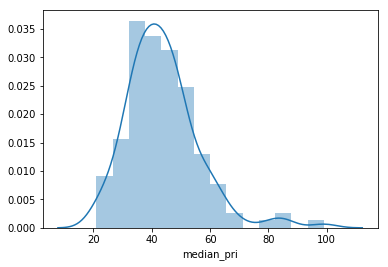

In [98]:

sbn.distplot(df['median_pri'])

## Spatial Distribution - Geovisualization Revisited

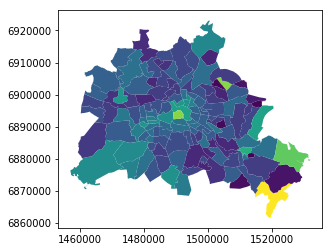

In [99]:
df.plot(column='median_pri')

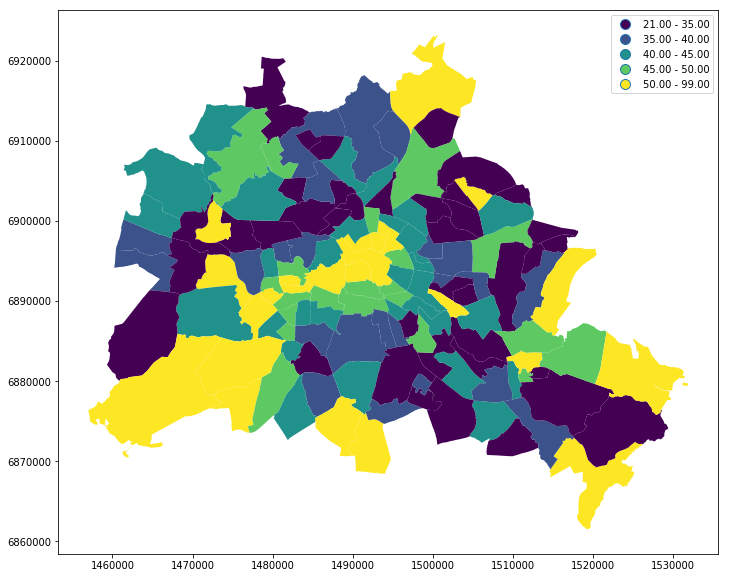

In [100]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='median_pri', scheme='Quantiles', legend=True, ax=ax)
#ax.set_xlim(150000, 160000)
#ax.set_ylim(208000, 215000)

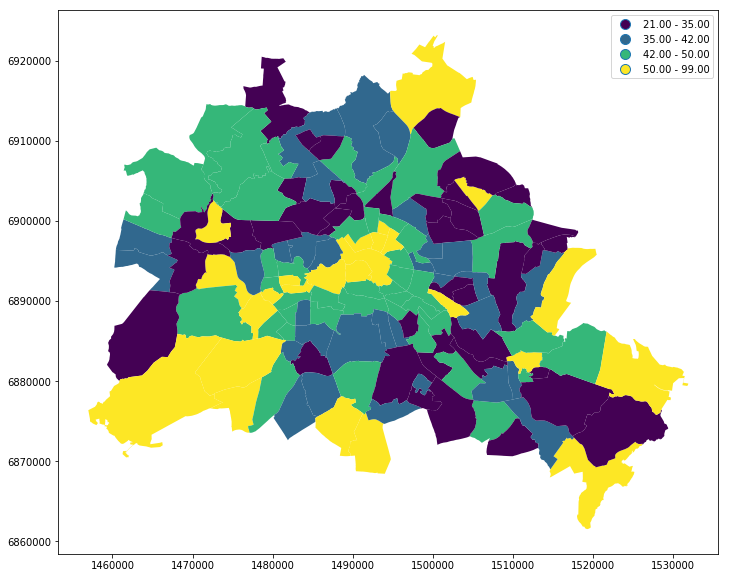

In [101]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='median_pri', scheme='Quantiles', k=4, legend=True, ax=ax)
#ax.set_xlim(150000, 160000)
#ax.set_ylim(208000, 215000)

In [102]:
import mapclassify.api as mc

In [103]:
y = df['median_pri']
mb4 = mc.Maximum_Breaks(y, k=4)

In [104]:
mb4

              Maximum_Breaks             
 
Lower            Upper              Count
         x[i] <= 75.000               134
75.000 < x[i] <= 82.500                 1
82.500 < x[i] <= 92.000                 2
92.000 < x[i] <= 99.000                 1

In [105]:
mb4.yb

array([0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [106]:
df['mb4'] = mb4.yb

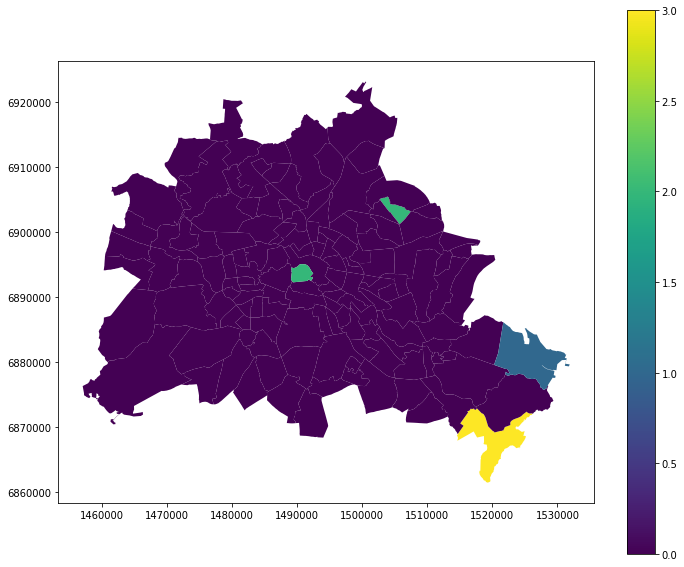

In [107]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='mb4',  legend=True, ax=ax)
#ax.set_xlim(150000, 160000)
#ax.set_ylim(208000, 215000)

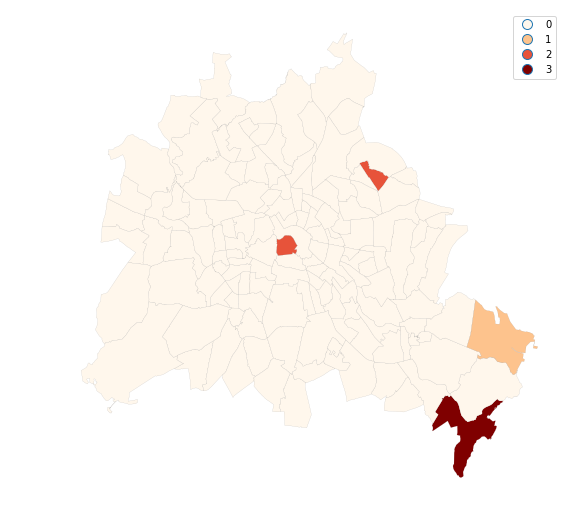

In [108]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=mb4.yb).plot(column='cl', categorical=True, \
                                      k=4, cmap='OrRd', linewidth=0.1, ax=ax,\
                                      edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

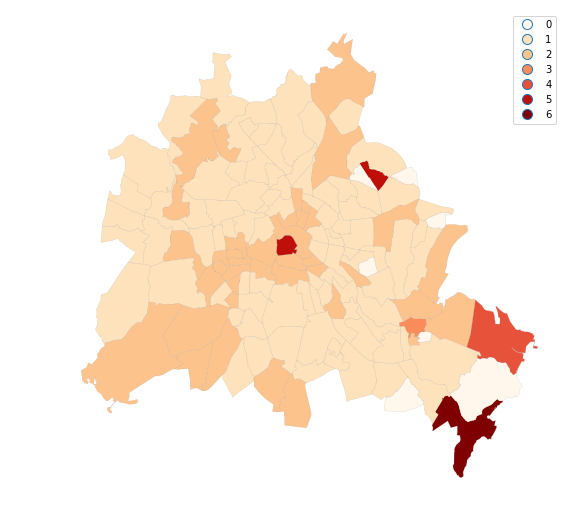

In [109]:
mb = mc.Maximum_Breaks
k = 7
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=mb(y, k=k).yb).plot(column='cl', categorical=True, \
                                      k=k, cmap='OrRd', linewidth=0.1, ax=ax,\
                                      edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

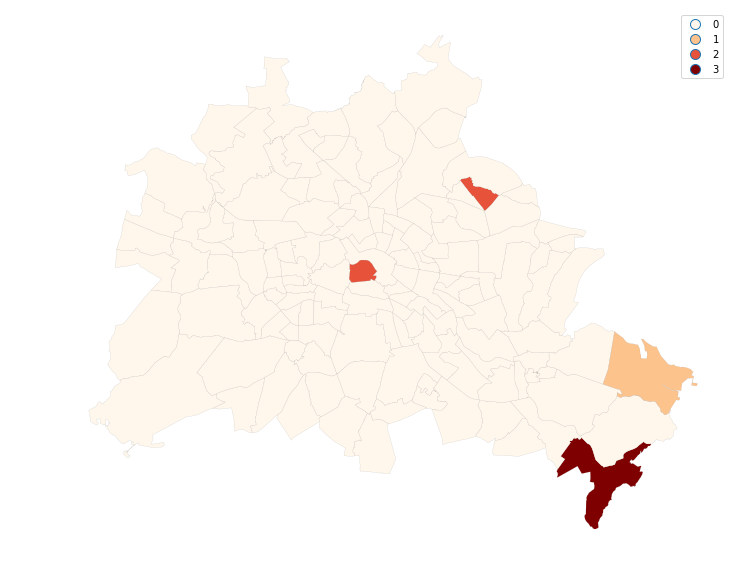

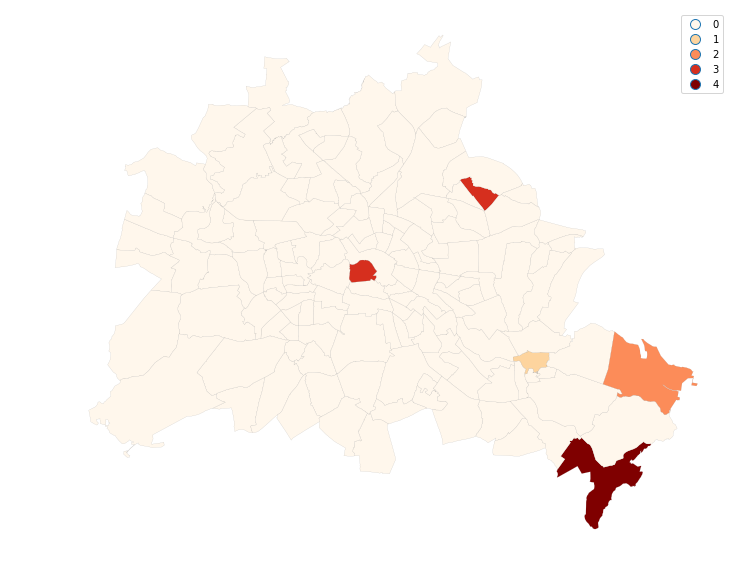

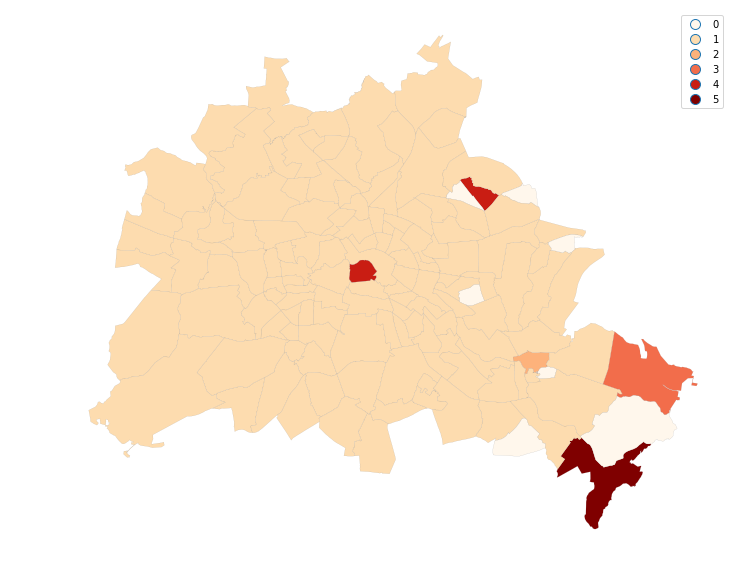

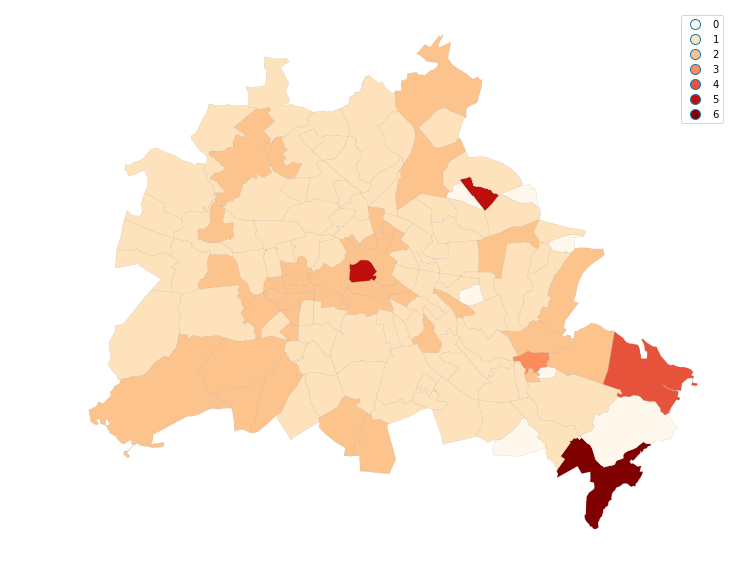

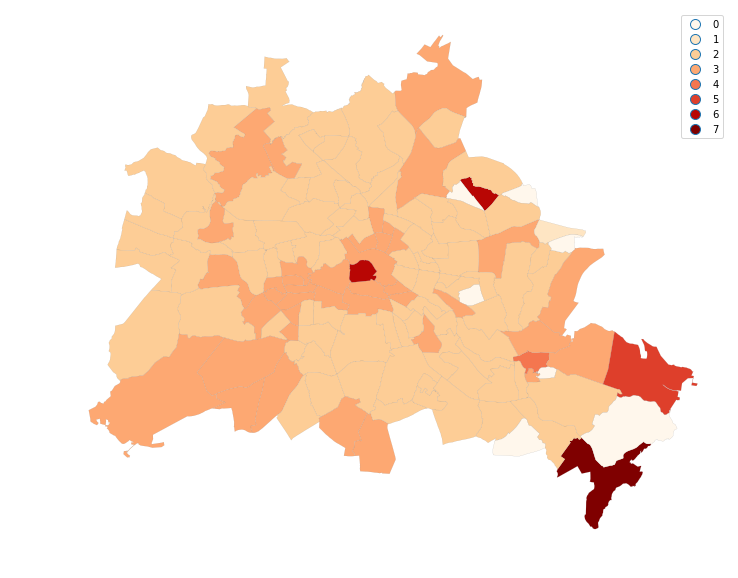

In [110]:
for k in range(4, 9):
    
    f, ax = plt.subplots(1, figsize=(12, 10))
    df.assign(cl=mb(y, k=k).yb).plot(column='cl', categorical=True, \
                                      k=k, cmap='OrRd', linewidth=0.1, ax=ax,\
                                      edgecolor='grey', legend=True)
    ax.set_axis_off()
    plt.show()

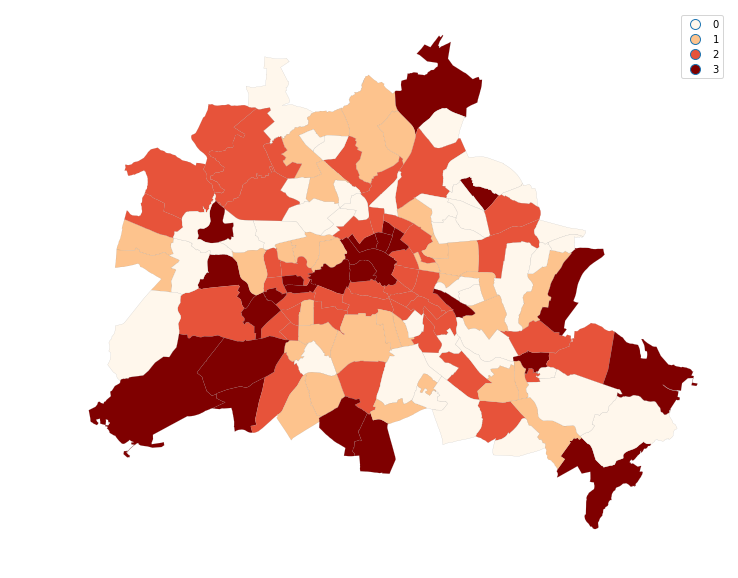

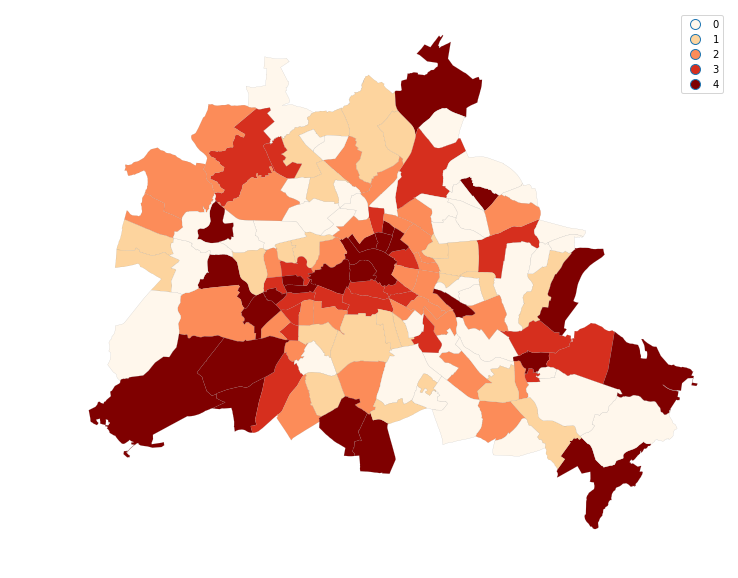

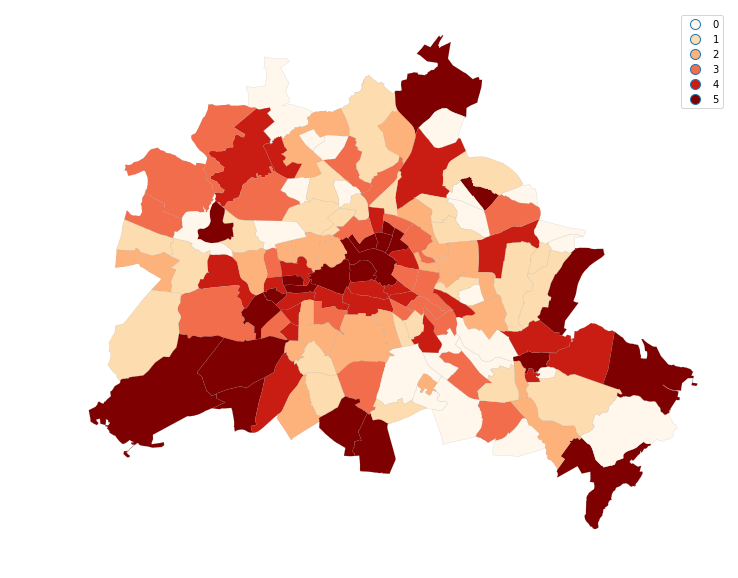

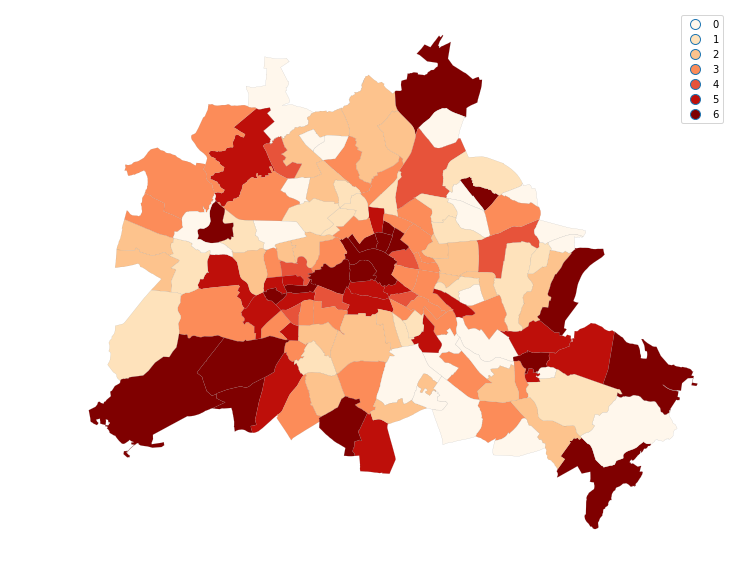

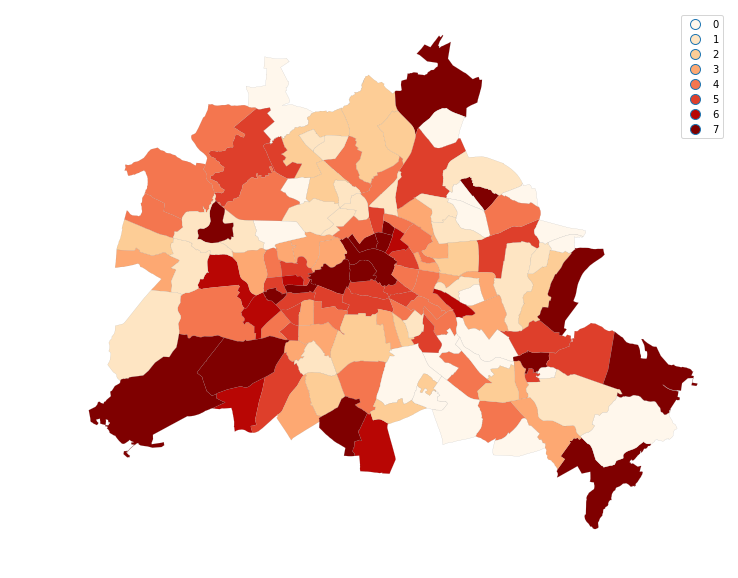

In [111]:
Q = mc.Quantiles
for k in range(4, 9):
    
    f, ax = plt.subplots(1, figsize=(12, 10))
    df.assign(cl=Q(y, k=k).yb).plot(column='cl', categorical=True, \
                                      k=k, cmap='OrRd', linewidth=0.1, ax=ax,\
                                      edgecolor='grey', legend=True)
    ax.set_axis_off()
    plt.show()

## Spatial Autocorrelation

### Binary Case

In [112]:
y.median()

42.0

In [113]:
yb = y > y.median()
df['yb'] = yb

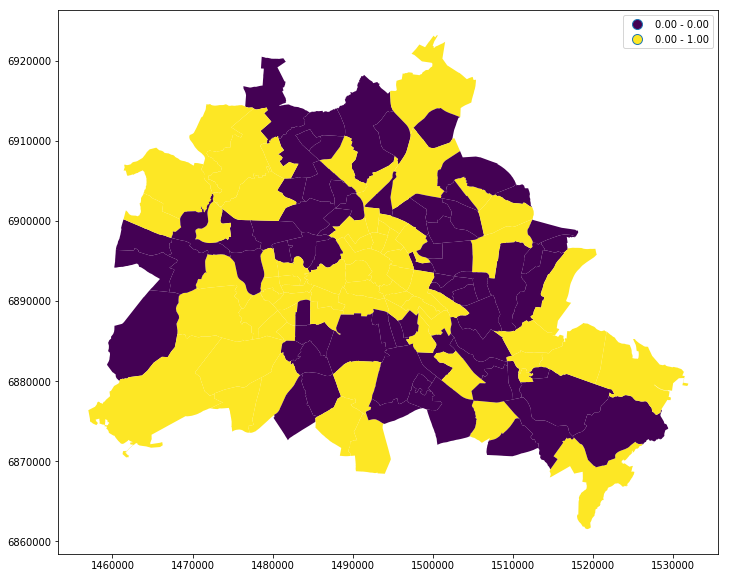

In [114]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', scheme='Quantiles', k=2, legend=True, ax=ax)
#ax.set_xlim(150000, 160000)
#ax.set_ylim(208000, 215000)

In [115]:
import esda 
wq =  lp.Queen.from_dataframe(df)
wq.transform = 'b'
jc = esda.join_counts.Join_Counts(yb, wq)

In [116]:
jc.bb

121.0

In [117]:
jc.ww

114.0

In [118]:
jc.bw

150.0

In [119]:
jc.p_sim_bb

0.001

In [120]:
jc.mean_bb

92.84384384384384

### Continuous Case

In [121]:
wq.transform = 'r'

In [122]:
y = df['median_pri']

In [123]:
mi = esda.moran.Moran(y, wq)

In [124]:
mi.EI

-0.0072992700729927005

In [125]:
mi.p_sim

0.029

In [126]:
mi.I

0.09715984916381672

In [127]:
esda.moran.Moran??

In [128]:
wq.s0

138.0

In [129]:
miy = esda.moran.Moran(y, wq)

In [130]:
miy.I

0.09715984916381672

In [131]:
miy.p_sim

0.024

In [132]:
miy.EI

-0.0072992700729927005

### Local Autocorrelation: Hot and Cold Spots

In [133]:
np.random.seed(12345)
import esda

In [134]:
wq.transform = 'r'
lag_price = lp.lag_spatial(wq, df['median_pri'])


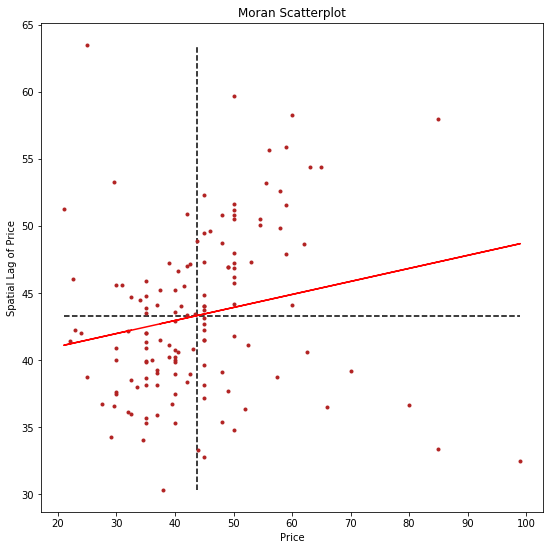

In [135]:
price = df['median_pri']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price 
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Price')
plt.xlabel('Price')
plt.show()


In [136]:
li = esda.moran.Moran_Local(y, wq)

/home/serge/anaconda3/envs/gdsbook3/lib/python3.5/site-packages/esda/moran.py:835: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/home/serge/anaconda3/envs/gdsbook3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/serge/anaconda3/envs/gdsbook3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/serge/anaconda3/envs/gdsbook3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [137]:
pd.isnull(y).sum()

0

In [138]:
li.geoda_quads

False

In [139]:
li.quads

[1, 2, 3, 4]

In [140]:
li.q

array([2, 1, 1, 4, 2, 3, 2, 1, 3, 4, 3, 1, 3, 1, 1, 3, 3, 2, 3, 1, 1, 1,
       1, 2, 2, 3, 4, 4, 3, 4, 2, 3, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       2, 3, 3, 2, 2, 4, 3, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4, 2, 2,
       2, 4, 4, 3, 3, 4, 3, 4, 2, 4, 4, 1, 2, 1, 4, 3, 4, 2, 3, 3, 3, 3,
       3, 3, 4, 3, 4, 3, 4, 1, 1, 1, 3, 3, 1, 1, 1, 3, 4, 1, 4, 2, 3, 1,
       1, 2, 4, 2, 2, 2, 1, 1, 3, 3, 4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3])

In [141]:
(li.p_sim < 0.06).sum()

26

In [142]:
df['median_pri'] = y

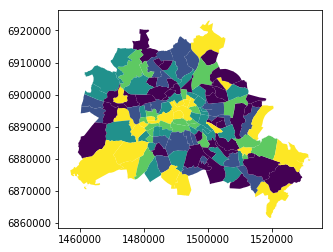

In [143]:
df.plot(column='median_pri', scheme='quantiles')

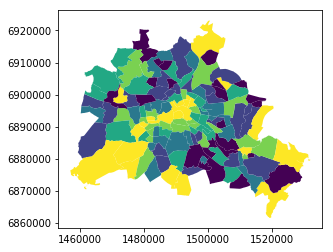

In [144]:
df.plot(column='median_pri', scheme='quantiles', k=6)

In [145]:
sig = li.p_sim < 0.01
hotspot = sig * li.q==1
coldspot = sig * li.q==3

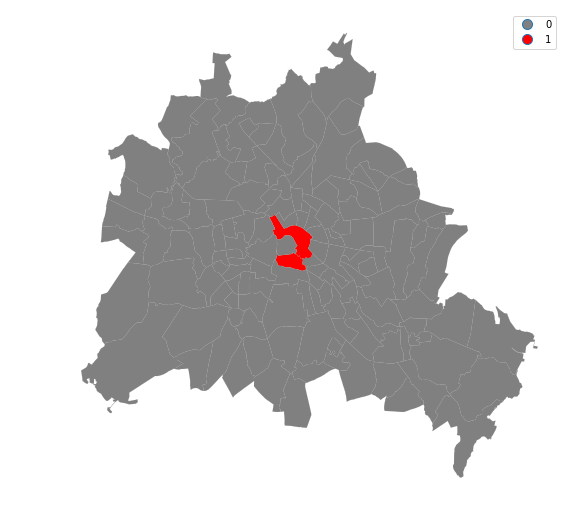

In [146]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['grey', 'red'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=hotspot*1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

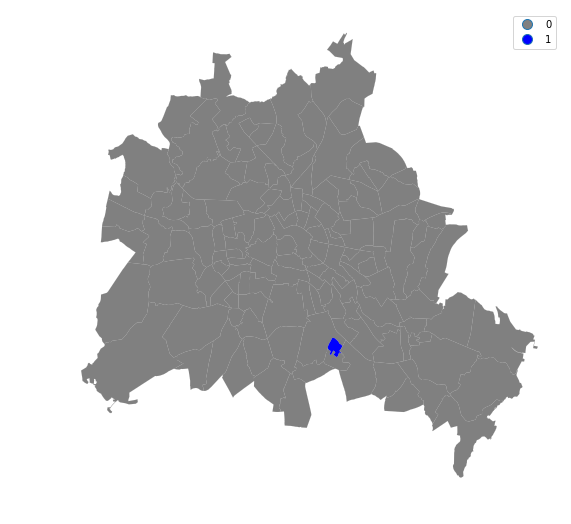

In [147]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['grey', 'blue'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=coldspot*1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

In [148]:
coldspot.sum()

1